## Document Similarity using nltk and scikit-learn

#### Python Imports

In [1]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud

In [2]:
%matplotlib inline
%reload_ext watermark

In [3]:
%watermark -n -v -p nltk,numpy,pandas,matplotlib,scikit-learn

Python implementation: CPython
Python version       : 3.10.6
IPython version      : 8.7.0

nltk        : 3.8.1
numpy       : 1.23.5
pandas      : 1.5.2
matplotlib  : 3.6.2
scikit-learn: 1.2.0



## *** Mathematical Intuition

In [4]:
v1 = np.array([3.0, 0])
v2 = np.array([2.0, 0])
v3 = np.array([3.0, 1.0])
v4 = np.array([0, 3.0])
xmin, xmax = -4, 4
ymin, ymax = -4, 4

#### Case-1: Documents with same words

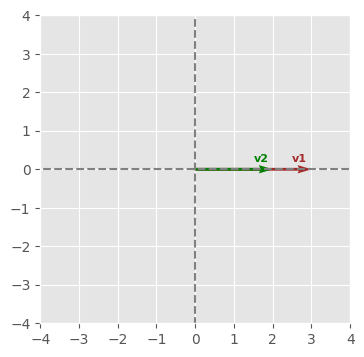

In [5]:
plt.style.use('ggplot')
plt.figure(figsize=(4, 4))
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xticks(np.arange(xmin, xmax+1, 1.0))
plt.yticks(np.arange(ymin, ymax+1, 1.0))
plt.axhline(y=0, xmin=xmin, xmax=xmax, linestyle='--', color='grey')
plt.axvline(x=0, ymin=ymin, ymax=ymax, linestyle='--', color='grey')
plt.quiver([0], [0], [v1[0]], [v1[1]], scale=8, width=0.009, color='brown')
plt.annotate('v1', xy=(2.5, 0.2), fontsize=8, weight='bold', color='brown')
plt.quiver([0], [0], [v2[0]], [v2[1]], scale=8, width=0.009, color='green')
plt.annotate('v2', xy=(1.5, 0.2), fontsize=8, weight='bold', color='green')
plt.show()

#### Case-2: Documents with some common words and some different

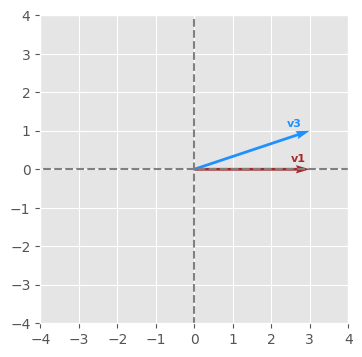

In [6]:
plt.style.use('ggplot')
plt.figure(figsize=(4, 4))
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.axis('square')
plt.xticks(np.arange(xmin, xmax+1, 1.0))
plt.yticks(np.arange(ymin, ymax+1, 1.0))
plt.axhline(y=0, xmin=xmin, xmax=xmax, linestyle='--', color='grey')
plt.axvline(x=0, ymin=ymin, ymax=ymax, linestyle='--', color='grey')
plt.quiver([0], [0], [v1[0]], [v1[1]], scale=8, width=0.009, color='brown')
plt.annotate('v1', xy=(2.5, 0.2), fontsize=8, weight='bold', color='brown')
plt.quiver([0], [0], [v3[0]], [v3[1]], scale=8, width=0.009, color='dodgerblue')
plt.annotate('v3', xy=(2.4, 1.1), fontsize=8, weight='bold', color='dodgerblue')
plt.show()

#### Case-3: Documents with different words

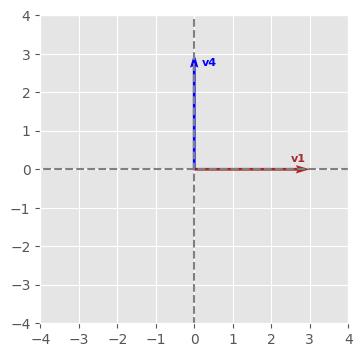

In [7]:
plt.style.use('ggplot')
plt.figure(figsize=(4, 4))
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.axis('square')
plt.xticks(np.arange(xmin, xmax+1, 1.0))
plt.yticks(np.arange(ymin, ymax+1, 1.0))
plt.axhline(y=0, xmin=xmin, xmax=xmax, linestyle='--', color='grey')
plt.axvline(x=0, ymin=ymin, ymax=ymax, linestyle='--', color='grey')
plt.quiver([0], [0], [v1[0]], [v1[1]], scale=8, width=0.009, color='brown')
plt.annotate('v1', xy=(2.5, 0.2), fontsize=8, weight='bold', color='brown')
plt.quiver([0], [0], [v4[0]], [v4[1]], scale=8, width=0.009, color='blue')
plt.annotate('v4', xy=(0.2, 2.7), fontsize=8, weight='bold', color='blue')
plt.show()

## *** Document Similarity Demo

In [8]:
nltk.data.path.append("./nltk_data")

#### Initialize the corpus with four documents

In [9]:
documents = [
    'Python is a high-level, general-purpose programming language that is dynamically typed and garbage-collected.',
    'Go is a statically typed, compiled high-level programming language designed with memory safety, garbage collection, and CSP-style concurrency.',
    'Java is a high-level, class-based, object-oriented programming language that is designed to have as few implementation dependencies as possible.',
    'Leadership encompasses the ability of an individual, group or organization to "lead", influence or guide other individuals, teams, or entire organizations.'
]

#### Load the stop words from nltk

In [10]:
stop_words = stopwords.words('english')

#### Initialize the word tokenizer from nltk

In [11]:
word_tokenizer = WordPunctTokenizer()

#### Initialize the lemmatizer from nltk

In [12]:
word_lemmatizer = nltk.WordNetLemmatizer()

#### Cleanse and collect words from the corpus by removing punctuations, stop words, and words of size less than 2

In [13]:
vocabulary_dict = defaultdict(int)
cleansed_documents = []
for doc in documents:
    tokens = word_tokenizer.tokenize(doc)
    alpha_words = [word.lower() for word in tokens if word.isalpha() and len(word) > 2 and word not in stop_words]
    final_words = [word_lemmatizer.lemmatize(word) for word in alpha_words]
    for word in final_words:
        vocabulary_dict[word] += 1
    cleansed_doc = ' '.join(final_words)
    cleansed_documents.append(cleansed_doc)
cleansed_documents

['python high level general purpose programming language dynamically typed garbage collected',
 'statically typed compiled high level programming language designed memory safety garbage collection csp style concurrency',
 'java high level class based object oriented programming language designed implementation dependency possible',
 'leadership encompasses ability individual group organization lead influence guide individual team entire organization']

#### Display a word cloud using the unique words from the corpus

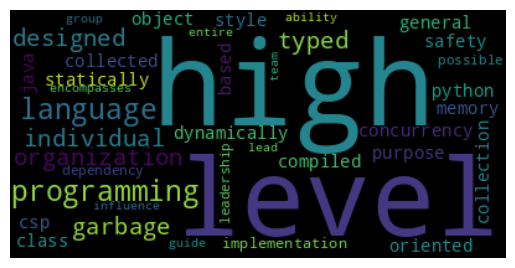

In [14]:
word_cloud = WordCloud()
word_cloud.generate_from_frequencies(vocabulary_dict)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Sort the unique words by frequency

In [15]:
sorted_vocabulary = sorted(vocabulary_dict.items(), key=lambda kv: kv[1], reverse=True)
sorted_vocabulary[:15]

[('high', 3),
 ('level', 3),
 ('programming', 3),
 ('language', 3),
 ('typed', 2),
 ('garbage', 2),
 ('designed', 2),
 ('individual', 2),
 ('organization', 2),
 ('python', 1),
 ('general', 1),
 ('purpose', 1),
 ('dynamically', 1),
 ('collected', 1),
 ('statically', 1)]

#### Collect all the unique words into a list

In [16]:
vocabulary = []
for word, count in sorted_vocabulary:
    vocabulary.append(word)
vocabulary[:15]

['high',
 'level',
 'programming',
 'language',
 'typed',
 'garbage',
 'designed',
 'individual',
 'organization',
 'python',
 'general',
 'purpose',
 'dynamically',
 'collected',
 'statically']

#### Initialize an instance of the TF-IDF vectorizer

In [17]:
word_vectorizer = TfidfVectorizer(vocabulary=vocabulary)

#### Create the TF-IDF word vector for the corpus

In [18]:
matrix = word_vectorizer.fit_transform(cleansed_documents).toarray()

#### Display the word vector as a pandas dataframe

In [19]:
documents_df = pd.DataFrame(data=matrix, columns=vocabulary)
documents_df

,high,level,programming,language,typed,garbage,designed,individual,organization,python,...,possible,leadership,encompasses,ability,group,lead,influence,guide,team,entire
0,0.227484,0.227484,0.227484,0.227484,0.280988,0.280988,0.000000,0.000000,0.000000,0.356398,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.188266,0.188266,0.188266,0.188266,0.232546,0.232546,0.232546,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.199355,0.199355,0.199355,0.199355,0.000000,0.000000,0.246244,0.000000,0.000000,0.000000,...,0.312329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.485071,0.485071,0.000000,...,0.000000,0.242536,0.242536,0.242536,0.242536,0.242536,0.242536,0.242536,0.242536,0.242536


#### Display the similarity scores between the first versus each of the others

In [20]:
first_doc = matrix[0].reshape(1, -1)
for i in range(1, len(matrix)):
    next_doc = matrix[i].reshape(1, -1)
    similarity_score = cosine_similarity(first_doc, next_doc)
    print(f'Doc-1 vs Doc-{i+1} => {similarity_score}')

Doc-1 vs Doc-2 => [[0.30199557]]
Doc-1 vs Doc-3 => [[0.18140056]]
Doc-1 vs Doc-4 => [[0.]]
